In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import *

In [2]:
x_data, y_data = Utilities.load_data('../data/Classification_train.csv',start_x = 1,start_y = 0,end_y = 1)

scaler = StandardizationScale()
x_data_scaled = scaler.fit_transform(x_data)

scaler2 = NormalizationScale()
x_data_scaled = scaler2.fit_transform(x_data_scaled)

In [3]:
my_model = NeuralNet([
    Inputs(inputs=784),
    Layer(units=30, activation=Activations.relu),
    Layer(units=15, activation=Activations.relu),
    Layer(units=10, activation=Activations.softmax)
])

Epoch   1 ⫸ Cost 0.27904 ⫷
Epoch   2 ⫸ Cost 0.10098 ⫷
Epoch   3 ⫸ Cost 0.06883 ⫷
Epoch   4 ⫸ Cost 0.05499 ⫷
Epoch   5 ⫸ Cost 0.04238 ⫷
Epoch   6 ⫸ Cost 0.03141 ⫷
Epoch   7 ⫸ Cost 0.02639 ⫷
Epoch   8 ⫸ Cost 0.02191 ⫷
Epoch   9 ⫸ Cost 0.01826 ⫷
Epoch  10 ⫸ Cost 0.01357 ⫷
Epoch  11 ⫸ Cost 0.01065 ⫷
Epoch  12 ⫸ Cost 0.00729 ⫷
Epoch  13 ⫸ Cost 0.00678 ⫷
Epoch  14 ⫸ Cost 0.00451 ⫷
Epoch  15 ⫸ Cost 0.00306 ⫷
Epoch  16 ⫸ Cost 0.00235 ⫷
Epoch  17 ⫸ Cost 0.00248 ⫷
Epoch  18 ⫸ Cost 0.00162 ⫷
Epoch  19 ⫸ Cost 0.00159 ⫷
Epoch  20 ⫸ Cost 0.00107 ⫷
Epoch  21 ⫸ Cost 0.00083 ⫷
Epoch  22 ⫸ Cost 0.00063 ⫷
Epoch  23 ⫸ Cost 0.00056 ⫷
Epoch  24 ⫸ Cost 0.00048 ⫷
Epoch  25 ⫸ Cost 0.00042 ⫷
Epoch  26 ⫸ Cost 0.00040 ⫷
Epoch  27 ⫸ Cost 0.00034 ⫷
Epoch  28 ⫸ Cost 0.00034 ⫷
Epoch  29 ⫸ Cost 0.00031 ⫷
Epoch  30 ⫸ Cost 0.00028 ⫷
Epoch  31 ⫸ Cost 0.00027 ⫷
Epoch  32 ⫸ Cost 0.00025 ⫷
Epoch  33 ⫸ Cost 0.00024 ⫷
Epoch  34 ⫸ Cost 0.00022 ⫷
Epoch  35 ⫸ Cost 0.00021 ⫷
Epoch  36 ⫸ Cost 0.00020 ⫷
Epoch  37 ⫸ Cost 0.00019 ⫷
E

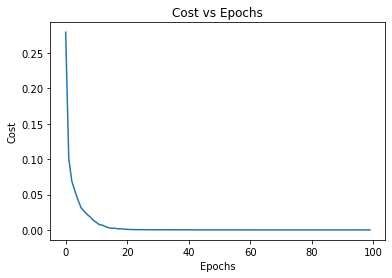

In [4]:
cost_history = my_model.fit(x_data_scaled,y_data,
                            cost_function=CategoricalCrossEntropy,
                            epochs=100,
                            alpha=0.3,
                            lambda_=0,
                            batch_size=50,
                            plot_cost=True)


In [5]:
predictions = my_model.predict(x_data_scaled)
yhat_train = np.argmax(predictions,axis=1)
acc_train = Metrics.classifier_accuracy(yhat_train.reshape(-1,1), y_data)
print(f'Training accuracy: {acc_train}')

Training accuracy: 100.0


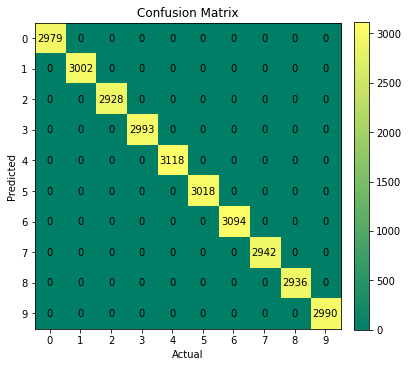

1.0 1.0


In [6]:
confusion,p,r = Metrics.confusion_matrix(yhat_train,y_data,metrics=True)
print(p,r)

In [7]:
x_test = Utilities.load_data('../data/Classification_test.csv', start_x=1)
x_test_scaled = scaler.transform(x_test)
x_test_scaled = scaler2.transform(x_test_scaled)
print(f'Train data: {x_test_scaled.shape}')

Train data: (10000, 784)


In [11]:
y_test = my_model.predict(x_test_scaled)
y_test = np.argmax(y_test,axis=1).reshape(-1,1)
df = pd.DataFrame(y_test, columns=['predicted value'])
df.to_csv('Classification_result.csv', index=False)